#ML - IntroClustering

<p><strong>Objetivo: </strong> El objetivo de este cuaderno es aplicar el algoritmo de clustering a un conjunto de datos sencillos. </p>

##Cargar los datos

Para este ejercicio se estará utilizando el conjunto de datos Iris, la cual es una fuente en línea en formato CSV (valores separados por coma).
<p> Este set de datos posee diferentes medidas sobre la planta Iris y es famosamente utilizado como ejemplo en analítica de datos:
  </p>
Se utiliza este conjunto para ejemplificar la creación de clusters:

<ul>
  <li>descripción: <a href="https://archive.ics.uci.edu/ml/datasets/Iris" target="_blank">https://archive.ics.uci.edu/ml/datasets/Iris</a></li>
  <li>fuente de datos: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data</a></li>
    <li>tipo de datos: csv</li>

Se va a utilizar la librería Pandas de Python para realizar la lectura de archivos. Se cargan los datos, se agregan cabeceras y se muestra el resultado:

In [0]:
# Importar libreria requerida
import pandas as pd
import numpy as np

# Leer datos desde archivo CSV
csv_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(csv_path,sep=",",header= None)

# Cargar cabeceras
headers = ["sepal_length","sepal_width","petal_length","petal_width","class"]
df.columns = headers

df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [0]:
df.shape

Out[2]: (150, 5)

In [0]:
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


##Aplicando Algortimo K-Medias

Seleccione solo las columnas numéricas:

In [0]:
df_kmeans = df[["sepal_length","sepal_width","petal_length","petal_width"]]

Se van a importar las librerías necesarias para utilizar el algortimo:

In [0]:
import numpy as np
from sklearn.cluster import KMeans

La clase KMedias tiene varios parámetros que se pueden utilizar, pero se estarán utilizando estos tres:
<ul>
    <li> <b>init</b>: Método de inicialización de los centroides. </li>
    <ul>
        <li> El valor será: "k-means++" </li>
        <li> k-means++: Elije centros de clusters iniciales eficientes para el clustering k-media de forma tal de acelerar la convergencia.</li>
    </ul>
    <li> <b>n_clusters</b>: El número de clusters a formar y la cantidad de centroides a generar. </li>
    <ul> <li> El valor será: 3 (se formarán 3 clusters)</li> </ul>
    <li> <b>n_init</b>: Cantidad de veces que el algoritmo k-medias se ejecutará con diferentes semillas centroides.</li>
    <ul> <li> El valor será: 12 </li> </ul>
</ul>

Inicializar KMedias con estos parámetros, donde el parámetro de salida se llama <b>k_means</b>:

In [0]:
#Configurar el algoritmo
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

Se aplica el modelo configurado previamente al conjunto de datos <b>df_kmeans</b>:

In [0]:
#Aplicar el algoritmo
k_means.fit(df_kmeans)

Out[15]: KMeans(n_clusters=3, n_init=12)

Se pueden ver las etiquetas que asignó el algoritmo a cada uno de los ejemplos:

In [0]:
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Se asignan las etiquetas a cada fila dentro del conjunto de datos y se puede validar que coinciden con la clasificación:

In [0]:
df["Clus_km"] = labels
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class,Clus_km
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1


##Visualizando los resultados

Se puede revisar fácilmente los valores centroides sacando el promedio de las características de cada cluster.

In [0]:
df.groupby('Clus_km').mean()

,sepal_length,sepal_width,petal_length,petal_width
Clus_km,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


Se puede visualizar el resultado de aplicar el algoritmo utilizando las columnas de <b>petal_length</b> y <b>petal_with</b>

Out[19]: Text(0.5, 1.0, 'Conjunto Iris')

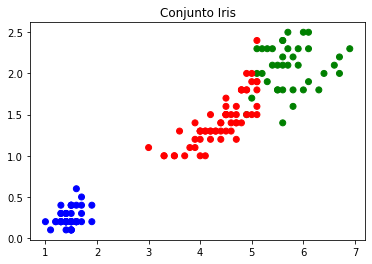

In [0]:
#Visualizando con Matplotlib
import matplotlib.pyplot as plt
color =np.array(['red','blue','green','cyan','yellow'])
scatter = plt.scatter(x=df.petal_length,y=df.petal_width,c=color[k_means.labels_])
plt.title("Conjunto Iris")


Se puede visualizar el resultado de aplicar el algoritmo utilizando las columnas de <b>sepal_length</b> y <b>sepal_width</b>

Out[20]: Text(0.5, 1.0, 'Conjunto Iris')

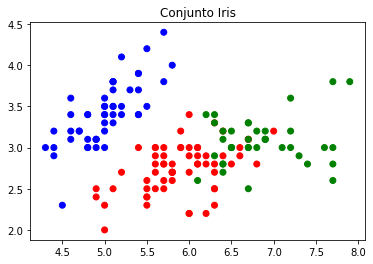

In [0]:
#Visualizando con Matplotlib
import matplotlib.pyplot as plt
color =np.array(['red','blue','green','cyan','yellow'])
scatter = plt.scatter(x=df.sepal_length,y=df.sepal_width,c=color[k_means.labels_])
plt.title("Conjunto Iris")

Out[21]: <seaborn.axisgrid.FacetGrid at 0x7f9ea04f0280>

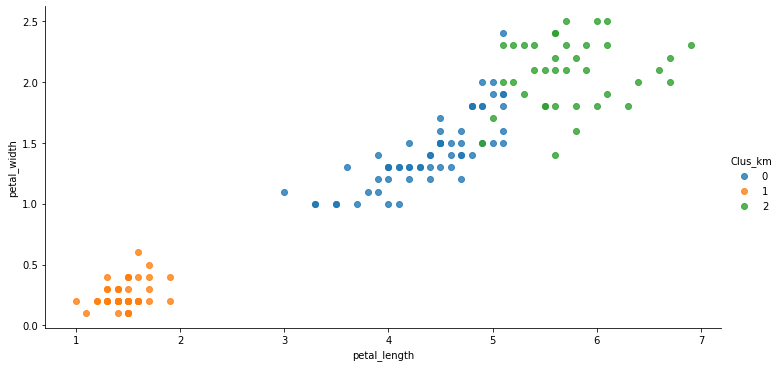

In [0]:
#Visualizando con Seaborn
import seaborn as sns
labels = pd.DataFrame(k_means.labels_)
sns.lmplot(x='petal_length',y='petal_width',data=df,hue='Clus_km',fit_reg=False, height = 5, aspect = 2)